In [125]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# get data
import RGC_Flicker
#from RGC_Flicker import get_flicker
reload(RGC_Flicker)
X_train, y_train, X_val, y_val, X_test, y_test = RGC_Flicker.get_flicker(num_classes=1)

In [126]:
print y_train.shape
print y_train[:2]
print X_train[:2, :]

(37000,)
[0 0]
[[ 0.47953596  0.4795296   0.47953596 -0.48046404  0.47954231  0.47953596
   0.47953596 -0.48046404 -0.48045769 -0.48045769 -0.48045769  0.47954231
   0.47954867  0.47955503 -0.48043862 -0.48043862 -0.48043226 -0.4804259
  -0.4804259   0.4795741 ]
 [ 0.47953596 -0.4804704  -0.48046404 -0.48046404 -0.48045769  0.47953596
  -0.48046404  0.47953596 -0.48045769 -0.48045769  0.47954231 -0.48045769
   0.47954867 -0.48044497 -0.48043862  0.47956138 -0.48043226  0.4795741
  -0.4804259  -0.4804259 ]]


In [52]:
print 'Proportion of 0s: ', float(len(np.where(y_train[:,0] == 1.)[0])) / y_train.shape[0]

Proportion of 0s:  0.816540540541


Train on 37000 samples, validate on 5000 samples
Epoch 1/10
4s - loss: 55.5350 - mean_squared_error: 381947.0011 - val_loss: 3.5976 - val_mean_squared_error: 0.3268
Epoch 2/10
4s - loss: 51.1614 - mean_squared_error: 152.6474 - val_loss: 3.5976 - val_mean_squared_error: 0.3268
Epoch 3/10
4s - loss: 33.5819 - mean_squared_error: 88.1519 - val_loss: 3.5976 - val_mean_squared_error: 0.3268
Epoch 4/10
4s - loss: 22.9195 - mean_squared_error: 23.4080 - val_loss: 3.5976 - val_mean_squared_error: 0.3268
Epoch 5/10
4s - loss: 20.4786 - mean_squared_error: 2.9138 - val_loss: 3.5976 - val_mean_squared_error: 0.3268
Epoch 6/10
4s - loss: 14.3076 - mean_squared_error: 1.7094 - val_loss: 3.5976 - val_mean_squared_error: 0.3268
Epoch 7/10
4s - loss: 10.4465 - mean_squared_error: 1.4782 - val_loss: 3.5976 - val_mean_squared_error: 0.3268
Epoch 8/10
4s - loss: 8.0034 - mean_squared_error: 0.8017 - val_loss: 3.5976 - val_mean_squared_error: 0.3268
Epoch 9/10
4s - loss: 6.4691 - mean_squared_error: 0.60

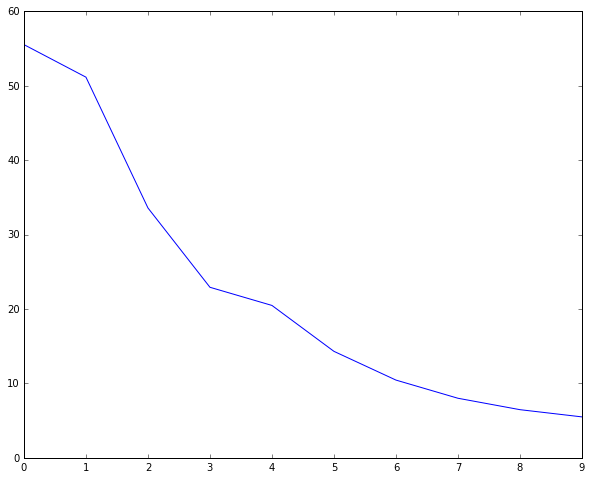

In [134]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.regularizers import l2, activity_l2
from keras.optimizers import RMSprop
import time 

model = Sequential()

hidden_num = 100
stim_bin = 20
num_classes = 1
val_data = X_val, y_val

# layer 1
model.add(Dense(output_dim=hidden_num, input_dim=stim_bin))
model.add(Activation("relu"))
model.add(Dropout(0.8))

# layer 2
model.add(Dense(output_dim=200, input_dim=hidden_num, W_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Dropout(0.5))

# output layer 
model.add(Dense(output_dim=num_classes))
model.add(Activation("relu"))

best_acc = 0.
best_batch = 0
best_hist = None

model.compile(loss='poisson', optimizer='SGD', metrics=['mean_squared_error'])

hist = model.fit(X_train, y_train, nb_epoch=10, batch_size=32, verbose=2, validation_data=val_data)
time.sleep(0.2)
loss_and_metrics = model.evaluate(X_test, y_test)

plt.plot(hist.history['loss'])

In [128]:
print model.metrics_names
print loss_and_metrics
print -np.log(loss_and_metrics[0]) * len(X_test)

['loss', 'mean_squared_error']
[3.8806233731224422, 0.35657142857142859]
-14237.955941


In [129]:
y_train[:100]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0])

In [130]:
print model.predict(X_train[:10, :])

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [131]:
y_train[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 2])